In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 24.0 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Training on {device}')

model = YOLO('yolov8n-seg.pt').to(device)

Training on cuda


100%|██████████| 6.74M/6.74M [00:00<00:00, 133MB/s]


In [5]:
model.info(True)

layer                                     name  gradient   parameters                shape         mu      sigma
    0                      model.0.conv.weight     False          432        [16, 3, 3, 3]   -0.00272      0.151 torch.float32
    1                        model.0.bn.weight     False           16                 [16]       2.88       1.79 torch.float32
    2                          model.0.bn.bias     False           16                 [16]     -0.151       4.02 torch.float32
    3                      model.1.conv.weight     False         4608       [32, 16, 3, 3]   0.000586     0.0613 torch.float32
    4                        model.1.bn.weight     False           32                 [32]       4.64       1.17 torch.float32
    5                          model.1.bn.bias     False           32                 [32]      0.837       1.44 torch.float32
    6                  model.2.cv1.conv.weight     False         1024       [32, 32, 1, 1]   -0.00828     0.0873 torch.float3

(261, 3409968, 0, 12.772710400000001)

In [6]:
model.model.model

Sequential(
  (0): Conv(
    (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (1): Conv(
    (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (2): C2f(
    (cv1): Conv(
      (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (cv2): Conv(
      (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (m): ModuleList(
      (0): Bottleneck(
        (cv1): Conv(
        

In [7]:
project = "/content/drive/MyDrive/YOLO_segmentation/result_seg/"

In [8]:
results = model.train(
    data = "/content/drive/MyDrive/YOLO_segmentation/data.yaml",
    epochs = 100,
    batch = 32,
    imgsz = 640,
    augment = True,
    single_cls = True,
    project = project,
    cos_lr = True,
    optimizer = 'AdamW',
    lr0 = 0.0005,
    lrf = 0.1,
    weight_decay=0.0005,
    plots = True
)

engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/YOLO_segmentation/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=/content/drive/MyDrive/YOLO_segmentation/result_seg/, name=train4, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 755k/755k [00:00<00:00, 23.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 88.5MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/YOLO_segmentation/train/labels.cache... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/YOLO_segmentation/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/YOLO_segmentation/result_seg/train4/labels.jpg... 
optimizer: AdamW(lr=0.0005, momentum=0.937) with parameter groups 72 weight(decay=0.0), 83 weight(decay=0.0005), 82 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/YOLO_segmentation/result_seg/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100       5.5G      2.339      3.945      5.235      1.813         20        640: 100%|██████████| 3/3 [00:06<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         10         10    0.00133        0.4    0.00504     0.0027      0.001        0.3    0.00194   0.000375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.51G      2.397      3.948      5.149      1.833         26        640: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         10         10      0.002        0.6     0.0214     0.0127    0.00167        0.5     0.0212     0.0024



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.47G      2.333      3.483      4.952      1.781         22        640: 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         10         10    0.00167        0.5      0.097      0.067          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.53G      1.939      2.916      4.036      1.454         24        640: 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         10         10    0.00167        0.5      0.097      0.067          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.52G      1.906      3.119       3.94      1.468         18        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         10         10   0.000776        0.1   0.000476   9.37e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.52G      1.839       2.83      3.835      1.397         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         10         10     0.0014        0.2    0.00129   0.000179          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.53G      1.642      2.636      3.672      1.328         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         10         10   0.000609        0.1   0.000561    0.00028          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.53G      1.647      2.634       3.41      1.297         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         10         10   0.000623        0.1   0.000571   0.000228   0.000623        0.1   0.000406   4.06e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.52G       1.77       2.69      3.372      1.344         18        640: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         10         10   0.000397        0.1   0.000345   0.000134          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.53G      1.634       2.16      2.906      1.271         21        640: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         10   0.000792        0.2   0.000554   0.000176          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.52G      1.527      2.233      2.561      1.182         28        640: 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         10         10   0.000559        0.1   0.000452   0.000122          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.53G      1.673      2.376      2.462      1.283         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         10         10   0.000742        0.1   0.000589   5.89e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.53G      1.732      2.185      2.346      1.278         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         10         10   0.000742        0.1   0.000589   5.89e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.53G      1.794      2.221      2.062      1.288         23        640: 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         10         10   0.000742        0.1   0.000589   5.89e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.53G      1.879      2.447      2.137      1.239         21        640: 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         10         10   0.000742        0.1   0.000589   5.89e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.53G      1.584      2.325      1.931      1.251         20        640: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         10         10   0.000742        0.1   0.000589   5.89e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.48G      1.604      1.968      1.751      1.263         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         10         10   0.000742        0.1   0.000589   5.89e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.53G      1.466      2.318      1.756      1.248         16        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         10         10   0.000742        0.1   0.000589   5.89e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.53G      1.589      2.076      1.773      1.196         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         10         10   0.000742        0.1   0.000589   5.89e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.53G      1.533      2.008      1.625      1.191         28        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         10         10     0.0909        0.1       0.05      0.025          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.53G      1.408      1.767      1.427      1.105         23        640: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         10         10     0.0909        0.1      0.136     0.0955          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.53G      1.426      1.893      1.454      1.115         24        640: 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         10         10     0.0909        0.1      0.136     0.0955          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.53G       1.37      1.929      1.404      1.079         22        640: 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         10         10        0.1        0.1      0.141     0.0984          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.54G      1.521      2.069      1.633      1.294         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all         10         10          1        0.1       0.55       0.33          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.53G      1.515      1.844      1.395      1.135         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         10         10        0.5        0.1      0.323      0.194          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.53G      1.534      1.932      1.422      1.135         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         10         10          1        0.1       0.55       0.44          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.53G      1.381      1.713      1.333      1.056         22        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         10         10          1        0.1       0.55       0.44          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.53G      1.417      1.919       1.37      1.163         19        640: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         10         10          1        0.3       0.65      0.463          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.53G      1.313      1.711      1.355      1.131         20        640: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         10         10          1        0.3       0.65      0.485          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.53G      1.422      1.801      1.361       1.19         22        640: 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         10         10        0.8        0.4      0.639      0.484        0.2        0.1      0.115     0.0115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.53G      1.472       1.99      1.381      1.152         22        640: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         10         10        0.8        0.4      0.639      0.466        0.2        0.1      0.115     0.0115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.53G      1.381      1.979      1.309      1.156         29        640: 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


                   all         10         10      0.625        0.5      0.577      0.417      0.125        0.1      0.104     0.0104

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.53G      1.337      1.968      1.324      1.101         22        640: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         10         10      0.571        0.4      0.501      0.364      0.143        0.1      0.113     0.0112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.53G      1.467      2.038      1.381      1.133         31        640: 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         10         10      0.571        0.4      0.526      0.395      0.143        0.1      0.113     0.0112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.53G      1.372      1.874      1.283      1.096         23        640: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         10         10      0.667        0.4      0.565      0.415      0.167        0.1      0.123     0.0123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.58G      1.313      1.696      1.154      1.061         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

                   all         10         10          1        0.4        0.7      0.493       0.25        0.1      0.161     0.0323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.54G      1.319      1.792      1.304      1.115         34        640: 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]


                   all         10         10        0.5        0.4      0.548      0.398       0.25        0.2      0.263     0.0351

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.52G      1.291      1.667      1.198      1.074         23        640: 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]


                   all         10         10      0.364        0.4      0.506      0.407      0.273        0.3      0.257     0.0456

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.53G      1.299      1.735      1.245      1.077         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         10         10      0.286        0.4      0.482        0.4      0.286        0.4      0.342     0.0658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.53G        1.2      1.553       1.18      1.029         28        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         10         10      0.626        0.4      0.481      0.352      0.469        0.3      0.426     0.0721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.54G      1.257       1.62      1.152      1.033         25        640: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         10         10      0.986        0.4      0.446      0.343      0.709        0.3      0.414     0.0638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.54G      1.284      1.789      1.218      1.058         21        640: 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         10         10          1      0.364      0.477      0.346      0.734      0.281      0.442      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.53G      1.217       1.49      1.102      1.069         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         10         10      0.977        0.4      0.484      0.358      0.977        0.4       0.54      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100       5.5G      1.261      1.526      1.182      1.059         25        640: 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         10         10       0.93        0.4      0.542      0.424       0.93        0.4      0.586      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.54G      1.173      1.508      1.131      1.014         23        640: 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         10         10      0.896        0.4      0.567      0.438      0.896        0.4      0.589      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.53G       1.19      1.644      1.125      1.029         30        640: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]

                   all         10         10      0.959        0.4      0.587      0.421      0.959        0.4      0.602      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.53G      1.291      1.642      1.177      1.087         23        640: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         10         10      0.958        0.4      0.621      0.432      0.825        0.4      0.706      0.224



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.54G      1.215      1.515      1.005      1.034         28        640: 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         10         10      0.955        0.4      0.558      0.426      0.955        0.4      0.531      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.53G      1.291        1.8      1.176      1.069         25        640: 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]


                   all         10         10      0.925        0.4      0.561      0.406      0.842      0.538      0.669      0.211

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.54G      1.187      1.746      1.085      1.047         25        640: 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         10         10      0.688      0.446      0.532      0.394       0.84      0.526      0.627      0.207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.54G      1.249      1.488      1.075      1.076         23        640: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]

                   all         10         10      0.586        0.4      0.514      0.377      0.769        0.5      0.602      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.54G      1.179       1.48      1.012      1.029         19        640: 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]

                   all         10         10      0.565        0.4      0.513      0.353      0.693      0.454      0.659      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.53G      1.242        1.7      1.074      1.057         34        640: 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         10         10      0.589        0.4      0.529      0.358      0.754        0.5       0.68      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.53G      1.076       1.52      1.027      1.023         28        640: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         10         10      0.574        0.4      0.552      0.367      0.722        0.5      0.699      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.54G      1.118      1.457       1.04      1.016         26        640: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         10      0.713      0.498      0.602      0.397      0.855       0.59      0.666      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.54G       1.23      1.493      1.141      1.006         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         10         10      0.697        0.7      0.662       0.47      0.989        0.5      0.732      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.53G       1.17      1.431      1.063     0.9684         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         10         10      0.758      0.628      0.702      0.468      0.599      0.599      0.627      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.53G      1.051      1.485     0.9994     0.9732         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all         10         10       0.77      0.672      0.738      0.479      0.773        0.4      0.609      0.209



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.53G      1.092       1.49     0.9983      1.007         20        640: 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         10         10      0.771        0.7      0.753      0.479      0.972        0.5      0.699      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.48G      1.057      1.486     0.9812      1.002         18        640: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         10         10      0.657      0.577      0.652      0.465      0.852       0.58      0.687      0.231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.53G      1.121      1.529     0.9537     0.9783         13        640: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         10         10      0.714      0.499      0.639      0.458      0.855      0.592      0.685      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.53G      1.052      1.493     0.9942     0.9792         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all         10         10      0.693        0.5      0.651      0.474      0.837        0.6      0.689      0.262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.53G      1.091       1.36     0.9247     0.9346         15        640: 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         10         10      0.694        0.5      0.634      0.449      0.837        0.6       0.67      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.54G      1.041      1.393     0.9741     0.9932         23        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]


                   all         10         10      0.686        0.5      0.653      0.459      0.826        0.6      0.647      0.241

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.53G     0.9589      1.292     0.9015      0.955         20        640: 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all         10         10      0.713      0.497      0.658      0.457      0.854      0.588       0.67      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.53G      1.086      1.461     0.9576     0.9954         27        640: 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         10         10      0.614       0.48      0.652       0.42          1      0.486      0.698      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.48G      1.067       1.39      0.941     0.9853         27        640: 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         10      0.486        0.6      0.636      0.419          1      0.493      0.689      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.53G     0.9323      1.223     0.8562     0.9755         29        640: 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         10         10        0.5        0.7      0.638      0.434          1      0.494      0.693       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.53G     0.9814      1.403     0.8749      0.926         28        640: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         10         10      0.485        0.7      0.634      0.418          1      0.496       0.69      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.53G      1.091      1.318     0.8882      1.014         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         10         10      0.512        0.5      0.656      0.451      0.993        0.5      0.713      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.54G      1.019      1.249     0.8457     0.9866         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         10         10      0.852      0.578      0.736      0.451      0.852      0.578      0.722      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.53G     0.9258      1.265     0.8071     0.9431         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         10         10      0.833        0.6      0.737      0.485      0.833        0.6      0.725       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.54G     0.9466      1.398     0.8639     0.9566         20        640: 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         10         10      0.777        0.6      0.739      0.486      0.777        0.6      0.729      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.54G     0.9564      1.169     0.8903     0.9478         24        640: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         10         10      0.638        0.6      0.685      0.511          1      0.498      0.753      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.48G      1.005      1.371     0.9203     0.9479         21        640: 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         10         10      0.637        0.6      0.707       0.52          1      0.496      0.762      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.53G      0.918      1.301     0.8341      0.929         20        640: 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         10         10      0.729        0.7      0.746        0.5          1      0.495      0.732      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.53G      1.073      1.434     0.9077     0.9743         29        640: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


                   all         10         10      0.646        0.7      0.772      0.502          1      0.494      0.729      0.298

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.53G     0.9651      1.168     0.8293     0.9778         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


                   all         10         10      0.757        0.7      0.746      0.509      0.626        0.8      0.789      0.304

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.53G     0.9653      1.427     0.8814     0.9523         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         10         10      0.748        0.7      0.746      0.502          1       0.49      0.779      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.53G     0.8967       1.33     0.8401     0.9097         25        640: 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         10         10      0.742        0.7      0.722      0.479      0.606        0.8      0.761      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.53G     0.9596      1.403     0.9319     0.9667         17        640: 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         10         10      0.736        0.7      0.742      0.497      0.613      0.793      0.781      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.53G     0.9753      1.266     0.8191     0.9598         31        640: 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         10         10      0.748        0.7      0.764       0.51          1      0.489       0.74      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.53G     0.8498      1.306     0.8334     0.9034         18        640: 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         10         10      0.776      0.693      0.764      0.527      0.607      0.772      0.797      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.53G     0.9746      1.225     0.9019          1         18        640: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         10         10      0.855      0.589      0.771      0.517      0.855      0.589      0.808      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.54G     0.9298      1.173      0.847     0.9352         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all         10         10       0.61      0.784       0.77      0.524      0.845        0.6      0.738      0.275

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.53G     0.8702      1.106     0.8254     0.9395         17        640: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         10         10       0.97        0.7      0.857      0.553      0.826        0.6      0.739      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.53G     0.9275      1.347     0.8334     0.9512         23        640: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         10         10      0.962        0.7      0.856      0.552      0.822        0.6      0.726      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.53G     0.8633      1.217      0.816     0.9092         20        640: 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         10         10      0.962        0.7      0.848      0.549          1      0.588      0.733      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.49G     0.8407      1.268     0.8333     0.9283         20        640: 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         10         10      0.974        0.7      0.848       0.55          1      0.593      0.774      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.53G     0.9297      1.278     0.8432     0.9591         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         10         10      0.983        0.7      0.858       0.57          1      0.595      0.827      0.319


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100       5.4G     0.8728      1.202     0.8251     0.9145         15        640: 100%|██████████| 3/3 [00:03<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         10         10          1      0.699      0.856      0.571          1      0.598      0.828      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100       5.4G     0.7727      1.077     0.7713     0.9047         17        640: 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         10         10      0.997        0.6      0.845      0.586      0.997        0.6      0.825      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100       5.4G      0.866       1.17     0.8019     0.9484         15        640: 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         10         10      0.998        0.6      0.845      0.577      0.998        0.6      0.825      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100       5.4G     0.9032      1.223     0.8412     0.9246         14        640: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all         10         10          1        0.6      0.836      0.574      0.865        0.7      0.842      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.51G     0.8997      1.147     0.8439     0.9497         17        640: 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]


                   all         10         10          1        0.6      0.832      0.573      0.834        0.7      0.835      0.331

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100       5.5G     0.8091      1.245     0.8037       0.92         15        640: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         10         10      0.997        0.6      0.829      0.564      0.826        0.7      0.831      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100       5.4G     0.7913       1.08     0.7347     0.9285         15        640: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         10         10      0.997        0.6      0.833      0.559          1      0.678      0.844      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.51G      0.827      1.194     0.7731      0.935         16        640: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         10         10      0.569      0.792      0.752      0.545      0.997        0.6      0.807      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100       5.4G     0.8196      1.182     0.7759     0.9126         17        640: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         10         10      0.547        0.8      0.747      0.546      0.996        0.6      0.811      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100       5.5G       0.81       1.17     0.7348     0.9238         16        640: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         10         10      0.549        0.8      0.747      0.558      0.991        0.6      0.816      0.333



100 epochs completed in 0.083 hours.
Optimizer stripped from /content/drive/MyDrive/YOLO_segmentation/result_seg/train4/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/YOLO_segmentation/result_seg/train4/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/YOLO_segmentation/result_seg/train4/weights/best.pt...
Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 213 layers, 2,936,979 parameters, 0 gradients, 10.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]


                   all         10         10      0.997        0.6      0.833      0.559          1      0.679      0.844      0.364
Speed: 0.2ms preprocess, 3.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/drive/MyDrive/YOLO_segmentation/result_seg/train4


In [9]:
resul = results.class_result(0)
print("Precision:", resul[0],
      "Recall:", resul[1],
      "mAP@50:", resul[2],
      "mAP@50-95:", resul[3],
      "Box Precision:", resul[4],
      "Box Recall:", resul[5],
      "Mask Precision:", resul[6],
      "Mask Recall:", resul[7])


Precision: 0.997390593135274 Recall: 0.6 mAP@50: 0.8333116883116884 mAP@50-95: 0.5585486056579081 Box Precision: 1.0 Box Recall: 0.6787530276891979 Mask Precision: 0.8435714285714287 Mask Recall: 0.36402823920265787


# Tuning:
All these are done at epochs = 20.
- adjusting lr0 and lrf:
  - At lr0: 0.0001:
    - Precision: 0.6852216975673765
    - Recall: 0.8
    - mAP@50: 0.7825151515151515
    - mAP@50-95: 0.5873152944539737
    - Box Precision: 0.8653535089912061
    - Box Recall: 0.8
    - Mask Precision: 0.8858459595959597
    - Mask Recall: 0.39754941348364997
    - #### **The loss fluctuates alot.**
  - At lr0: 0.001, weight_decay: 0.005:
    - Precision: 0.7596847851867932
    - Recall: 0.7
    - mAP@50: 0.8154105126899246
    - mAP@50-95: 0.6016188764166468
    - Box Precision: 0.8698578096168458
    - Box Recall: 0.8 Mask Precision: 0.8712070707070707
    - Mask Recall: 0.3996115807026623
    - #### **The loss still fluctuates**
  - At lr0: 0.0005 & epochs: 50:
    - Precision: 1.0
    - Recall: 0.7802640876170288
    - mAP@50: 0.9142307692307694
    - mAP@50-95: 0.6398655702405703
    - Box Precision: 1.0
    - Box Recall: 0.7802640876170288
    - Mask Precision: 0.9142307692307694
    - Mask Recall: 0.406044642857143

  - At lr0: 0.0005, epochs = 100, weight_decay: 0.005:
    -Precision: 0.997390593135274
    - Recall: 0.6
    - mAP@50: 0.8333116883116884
    - mAP@50-95: 0.5585486056579081
    - Box Precision: 1.0
    - Box Recall: 0.6787530276891979
    - Mask Precision: 0.8435714285714287
    - Mask Recall: 0.36402823920265787




## At epochs: 120, Batch: 64 :
- Precision: 0.762972712972713
- Recall: 0.8
- mAP@50: 0.8790277777777779
- mAP@50-95: 0.5513908319724188 Box Precision: 0.8092568217568218
- Box Recall: 0.8509125196625197
- Mask Precision: 0.8858459595959597
- Mask Recall: 0.34535956874130525

## With cos_lr, epochs: 120, Batch: 32 :
- Precision: 0.8486978085371659
- Recall: 0.5645307958560971
- mAP@50: 0.7806617647058822
- mAP@50-95: 0.5759162310795877
- Box Precision: 0.9970178511845175
- Box Recall: 0.7
- Mask Precision: 0.86492673992674
- Mask Recall: 0.3959106675889047

## Now, with lr0 = 0.001 and lrf = 0.1 :
- Precision: 0.8460661096826674
- Recall: 0.5534776606672032
- mAP@50: 0.7806617647058822
- mAP@50-95: 0.5758591418385535
- Box Precision: 1.0
- Box Recall: 0.6923348184786092
- Mask Precision: 0.8656015037593986
- Mask Recall: 0.3959457002690846




In [10]:
predictions = model.predict(source="/content/drive/MyDrive/YOLO_segmentation/test/images")


WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 1/10 /content/drive/MyDrive/YOLO_segmentation/test/images/im16_jpg.rf.289afe74e9d8261d9a5d5b7d3d33639c.jpg: 640x640 2 Guns, 18.2ms
WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 2/10 /content/drive/MyDrive/YOLO_segmentation/test/images/im2_jpg.rf.635eefcb544aa19551593d9be0bf587b.jpg: 640x640 1 Gun, 21.8ms
WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 3/10 /content/drive/MyDrive/YOLO_segmentation/test/images/im31_jpg.rf.d87fad48239ff2ee11e403863dd5091a.jpg: 640x640 1 Gun, 18.2ms
WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 4/10 /content/drive/MyDrive/YOLO_segmentation/test/images/im33_jpg.rf.156678fbf993feccf3bac0184a45d645.jpg: 640x640 1 Gun, 17.3ms
WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 5/10 /con

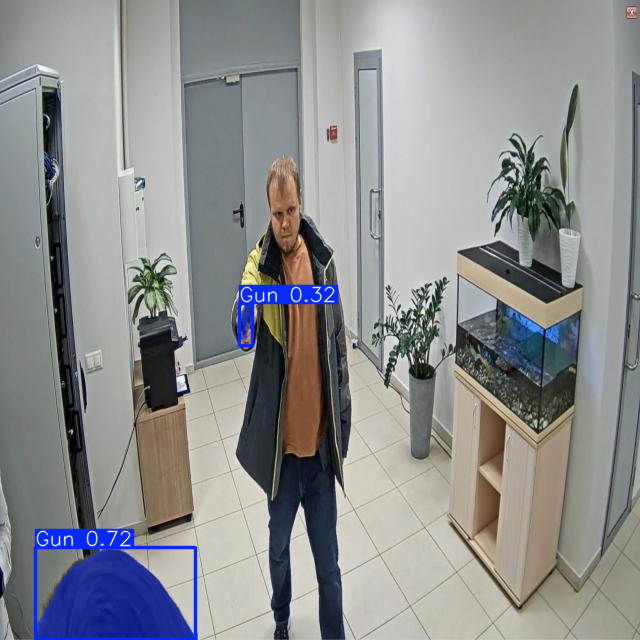

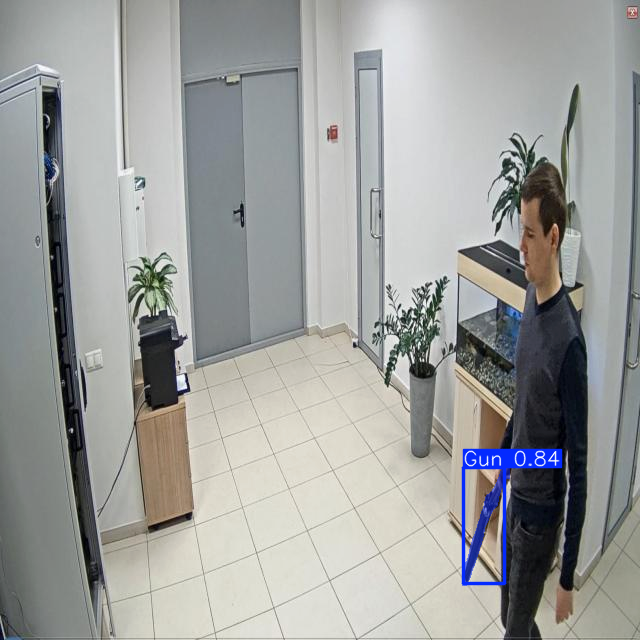

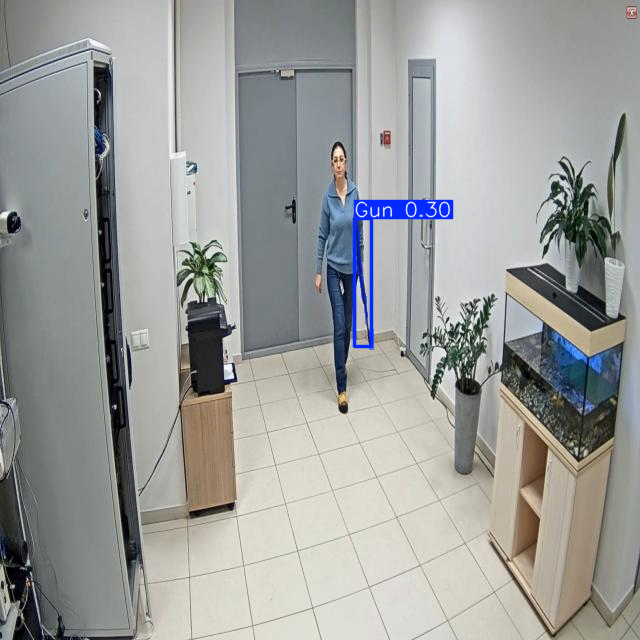

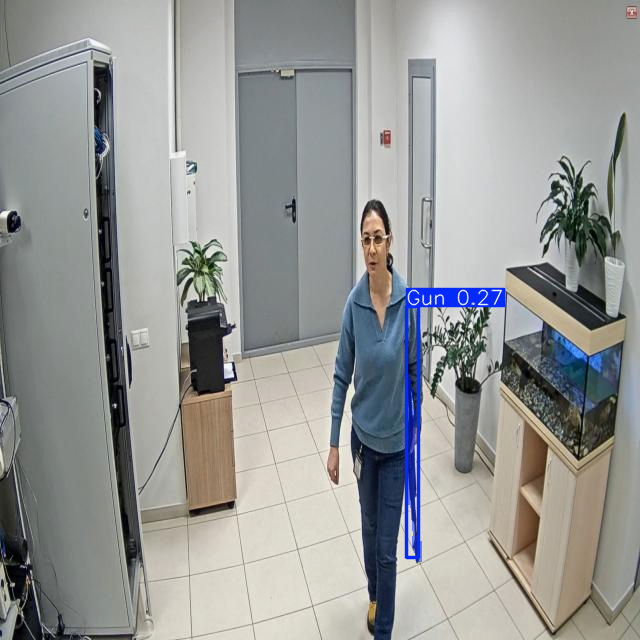

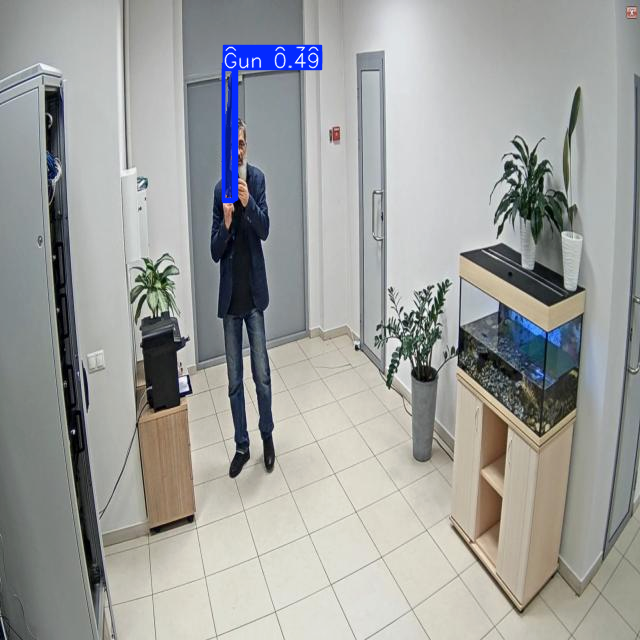

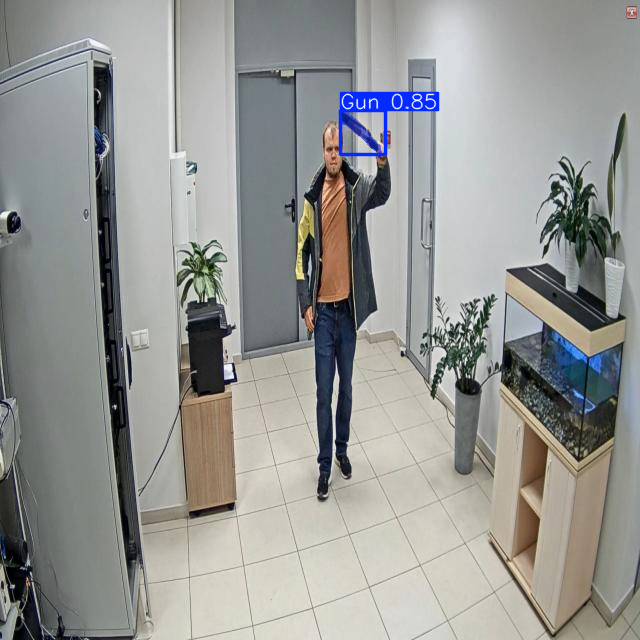

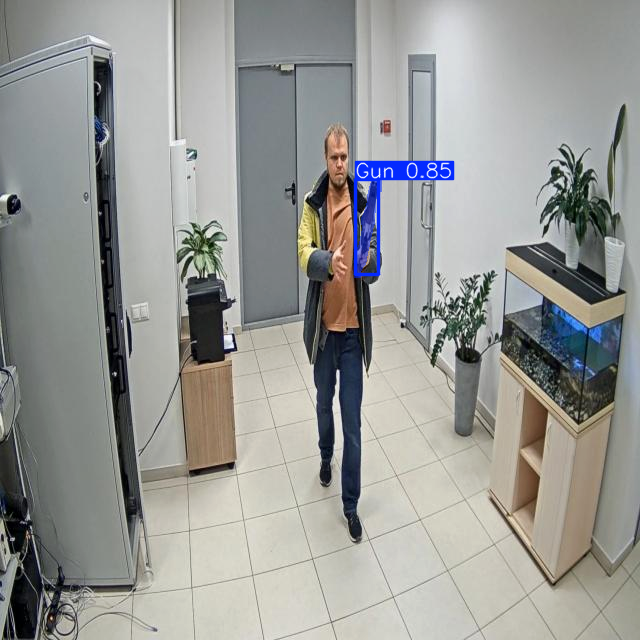

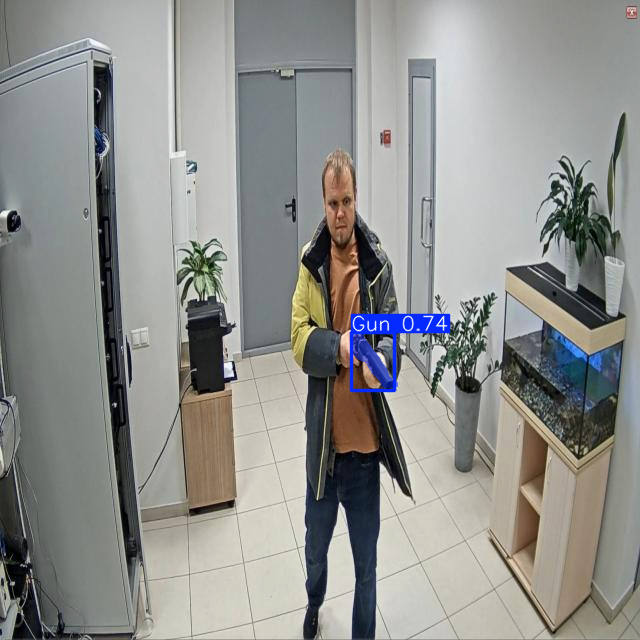

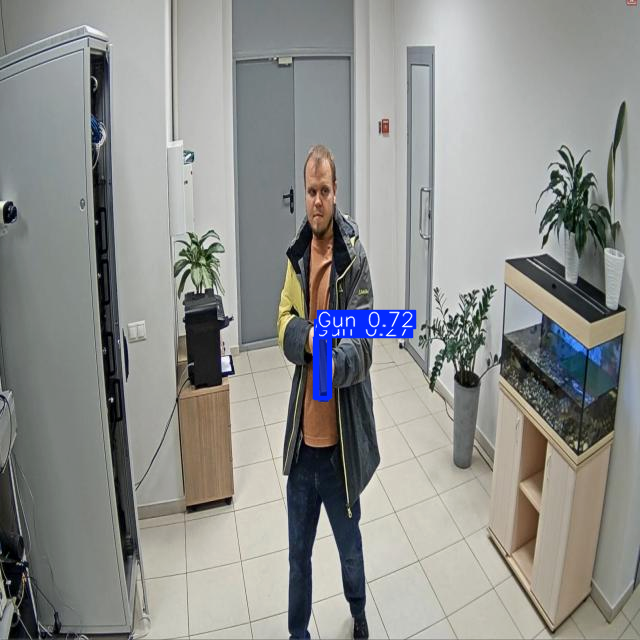

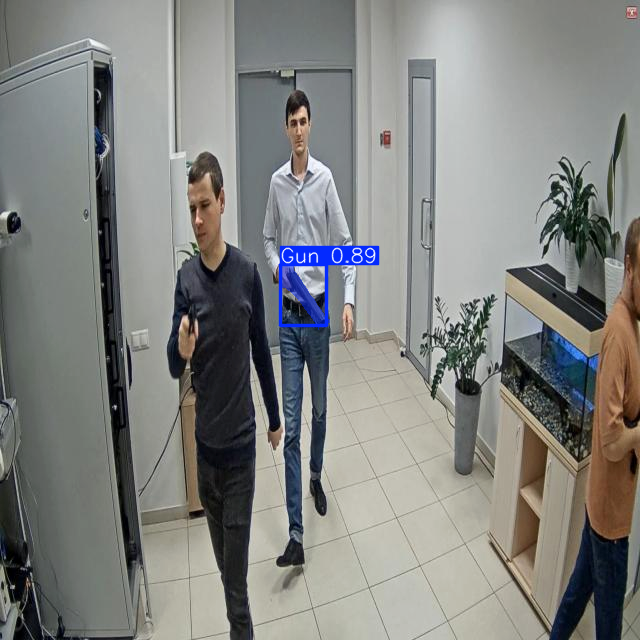

In [11]:
for result in predictions:
  result.show()